In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from pandas import DataFrame
from pandas import concat
from numpy import concatenate
from keras.regularizers import l2
from keras.layers import Activation
from sklearn import metrics
from sklearn.metrics import r2_score
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [4]:
df = pd.read_csv("airquality.csv",encoding='utf-8')
df

/home/gh555657/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
0,1,二林,彰化縣,88.0,細懸浮微粒,普通,4.2,0.3,0.3,46,...,103.0,37.0,8.4,9.7,1.4,2.3,293.0,2017/1/7 13:00,81.0,31.0
1,2,三重,新北市,52.0,懸浮微粒,普通,5.7,1.98,1.8,-,...,79.0,18.0,50.0,125.0,75.0,NaN,NaN,2017/1/7 13:00,56.0,14.0
2,3,三義,苗栗縣,78.0,細懸浮微粒,普通,3.3,0.32,0.4,34,...,64.0,36.0,11.0,16.0,4.8,3.3,193.0,2017/1/7 13:00,53.0,26.0
3,4,土城,新北市,81.0,細懸浮微粒,普通,3.7,0.46,0.7,51,...,60.0,42.0,17.0,21.0,4.0,2.0,201.0,2017/1/7 13:00,44.0,28.0
4,5,士林,臺北市,40.0,NaN,良好,3.7,0.43,0.4,45,...,25.0,22.0,16.0,20.0,4.2,1.8,289.0,2017/1/7 13:00,20.0,12.0
5,6,大同,臺北市,43.0,NaN,良好,3.6,1.23,1.3,-,...,55.0,23.0,37.0,55.0,18.0,NaN,NaN,2017/1/7 13:00,37.0,13.0
6,8,大園,桃園市,68.0,細懸浮微粒,普通,9.6,0.38,0.5,30,...,54.0,23.0,21.0,24.0,3.6,2.0,295.0,2017/1/7 13:00,59.0,23.0
7,9,大寮,高雄市,134.0,細懸浮微粒,對敏感族群不良,7.4,0.37,0.5,43,...,47.0,26.0,21.0,26.0,5.6,2.6,287.0,2017/1/7 13:00,83.0,48.0
8,10,小港,高雄市,154.0,細懸浮微粒,對所有族群不良,18.0,0.42,0.6,33,...,69.0,52.0,40.0,49.0,9.0,2.6,273.0,2017/1/7 13:00,92.0,61.0
9,11,中山,臺北市,50.0,NaN,良好,3.8,0.89,0.8,34,...,42.0,23.0,34.0,46.0,12.0,1.6,5.7,2017/1/7 13:00,26.0,15.0


In [5]:
CM = df['SiteName'].isin(['忠明']) #找忠明測站
df[CM]

,id,SiteName,Country,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,...,PM10,PM25,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,PM10_AVG,PM25_AVG
14013,15004,忠明,臺中市,148.0,細懸浮微粒,對敏感族群不良,3.5,1.36,1.3,3.1,...,112.0,59.0,37.0,79.0,42.0,0.6,196.0,2017/1/8 02:00,107.0,54.0
14089,15080,忠明,臺中市,148.0,細懸浮微粒,對敏感族群不良,2.7,1.06,1.4,2.7,...,91.0,53.0,29.0,58.0,29.0,0.8,149.0,2017/1/8 03:00,104.0,54.0
14165,15156,忠明,臺中市,146.0,細懸浮微粒,對敏感族群不良,1.9,0.81,1.3,2.5,...,70.0,43.0,22.0,33.0,11.0,0.4,20.0,2017/1/8 04:00,98.0,53.0
14241,15232,忠明,臺中市,136.0,細懸浮微粒,對敏感族群不良,1.8,0.75,1.3,2.5,...,63.0,30.0,23.0,39.0,15.0,0.5,326.0,2017/1/8 05:00,91.0,49.0
14317,15308,忠明,臺中市,125.0,細懸浮微粒,對敏感族群不良,2.1,0.92,1.2,2.6,...,51.0,29.0,23.0,56.0,33.0,0.9,292.0,2017/1/8 06:00,83.0,45.0
14393,15384,忠明,臺中市,117.0,細懸浮微粒,對敏感族群不良,2.2,0.95,1.2,2.6,...,51.0,32.0,22.0,70.0,49.0,0.8,190.0,2017/1/8 07:00,77.0,42.0
14469,15460,忠明,臺中市,111.0,細懸浮微粒,對敏感族群不良,2.0,0.93,1.1,3.4,...,34.0,33.0,20.0,55.0,35.0,0.7,163.0,2017/1/8 08:00,70.0,39.0
14545,15536,忠明,臺中市,107.0,細懸浮微粒,對敏感族群不良,2.1,0.69,0.9,9.8,...,29.0,29.0,23.0,45.0,22.0,1.2,318.0,2017/1/8 09:00,62.0,38.0
14621,15612,忠明,臺中市,100.0,細懸浮微粒,普通,2.5,0.35,0.8,24,...,27.0,22.0,15.0,22.0,7.1,3.3,311.0,2017/1/8 10:00,55.0,35.0
14697,15688,忠明,臺中市,94.0,細懸浮微粒,普通,2.5,0.31,0.7,25,...,36.0,24.0,12.0,20.0,7.5,2.5,24.0,2017/1/8 11:00,49.0,33.0


In [6]:
CM = df['SiteName'].isin(['忠明']) #找忠明測站
CM=df[CM].fillna(method='ffill').drop(columns=['WindSpeed','WindDirec','SiteName','AQI','id','Country','Pollutant','Status','CO_8hr','O3_8hr','NOx','PublishTime','PM10_AVG','PM25_AVG','NO']).reset_index(drop=True)
#只留下SiteName PM25 column


CM

,SO2,CO,O3,PM10,PM25,NO2
0,3.5,1.36,3.1,112.0,59.0,37.0
1,2.7,1.06,2.7,91.0,53.0,29.0
2,1.9,0.81,2.5,70.0,43.0,22.0
3,1.8,0.75,2.5,63.0,30.0,23.0
4,2.1,0.92,2.6,51.0,29.0,23.0
5,2.2,0.95,2.6,51.0,32.0,22.0
6,2.0,0.93,3.4,34.0,33.0,20.0
7,2.1,0.69,9.8,29.0,29.0,23.0
8,2.5,0.35,24,27.0,22.0,15.0
9,2.5,0.31,25,36.0,24.0,12.0


In [7]:
cd4 = CM['SO2']>50
CM[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2
4436,85.0,0.26,12,23.0,8.0,9.9
4437,85.0,0.26,12,23.0,8.0,9.9
4438,85.0,0.18,10,16.0,3.0,7.4
4439,85.0,0.19,11,12.0,6.0,6.2
4440,85.0,0.16,12,8.0,6.0,4.7
4441,85.0,0.15,11,5.0,5.0,5.5
4442,85.0,0.11,8.8,8.0,3.0,6.5
4443,85.0,0.11,7.3,14.0,4.0,6.3
4444,85.0,0.11,6.8,12.0,4.0,5.9
4445,85.0,0.12,4.7,14.0,6.0,7.1


In [8]:
CM.replace({0:np.nan,0.0:np.nan}, inplace=True) #將0全部改為空值
CM['SO2'].replace({85.0:np.nan,85:np.nan}, inplace=True)
CM['SO2'].replace({69.0:np.nan,69:np.nan}, inplace=True)
CM['PM10'].replace({322.0:np.nan,322:np.nan}, inplace=True)
CM

,SO2,CO,O3,PM10,PM25,NO2
0,3.5,1.36,3.1,112.0,59.0,37.0
1,2.7,1.06,2.7,91.0,53.0,29.0
2,1.9,0.81,2.5,70.0,43.0,22.0
3,1.8,0.75,2.5,63.0,30.0,23.0
4,2.1,0.92,2.6,51.0,29.0,23.0
5,2.2,0.95,2.6,51.0,32.0,22.0
6,2.0,0.93,3.4,34.0,33.0,20.0
7,2.1,0.69,9.8,29.0,29.0,23.0
8,2.5,0.35,24.0,27.0,22.0,15.0
9,2.5,0.31,25.0,36.0,24.0,12.0


In [9]:
CM.fillna(method='ffill', inplace=True) #以前面數字來取代0值


CM

,SO2,CO,O3,PM10,PM25,NO2
0,3.5,1.36,3.1,112.0,59.0,37.0
1,2.7,1.06,2.7,91.0,53.0,29.0
2,1.9,0.81,2.5,70.0,43.0,22.0
3,1.8,0.75,2.5,63.0,30.0,23.0
4,2.1,0.92,2.6,51.0,29.0,23.0
5,2.2,0.95,2.6,51.0,32.0,22.0
6,2.0,0.93,3.4,34.0,33.0,20.0
7,2.1,0.69,9.8,29.0,29.0,23.0
8,2.5,0.35,24.0,27.0,22.0,15.0
9,2.5,0.31,25.0,36.0,24.0,12.0


In [10]:
cd4 = CM['PM10']>200
CM[cd4] #輸出整筆資料

,SO2,CO,O3,PM10,PM25,NO2


In [11]:
CM['pr']=''
CM.drop([ 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,12371,12372],inplace=True)
CM.reset_index(drop=True,inplace=True)


CM.to_csv('CMpollution.csv')

CM

,SO2,CO,O3,PM10,PM25,NO2,pr
0,2.0,0.71,3.3,38.0,21.0,22.0,
1,2.9,0.61,3.5,35.0,15.0,19.0,
2,2.3,0.46,23.0,17.0,11.0,7.7,
3,2.7,0.43,22.0,14.0,12.0,8.9,
4,2.7,0.44,23.0,12.0,6.0,8.4,
5,2.6,0.43,25.0,11.0,16.0,9.4,
6,2.7,0.49,22.0,2.0,11.0,14.0,
7,3.0,0.69,15.0,9.0,13.0,21.0,
8,2.9,0.63,23.0,21.0,7.0,17.0,
9,3.1,0.56,24.0,31.0,10.0,17.0,


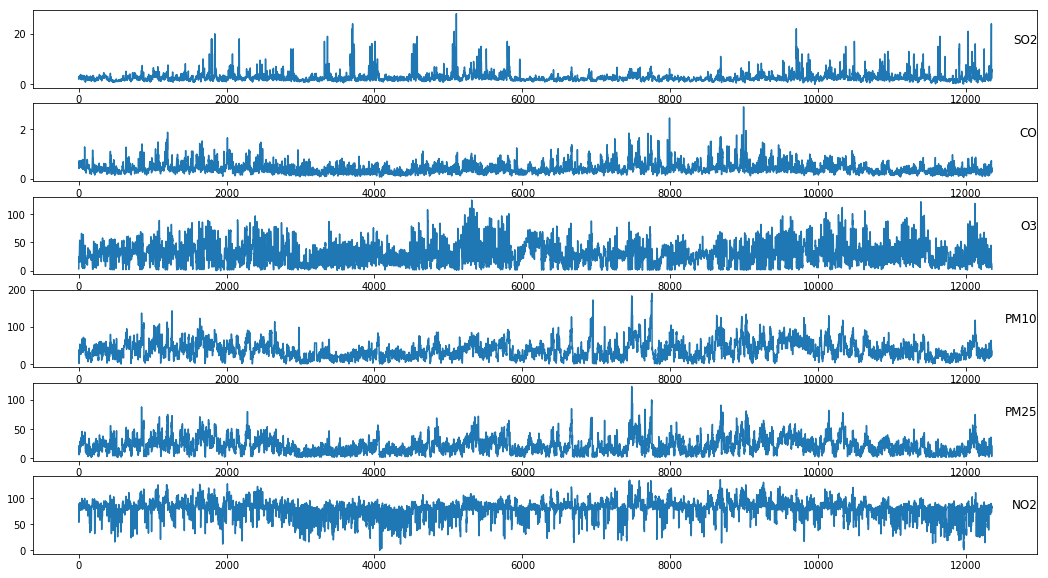

In [12]:
# load dataset
dataset =pd.read_csv('CMpollution.csv',header=0,index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1,2, 3, 4,5]
i=1
plt.figure(figsize=(18,10)) 
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [13]:
dataset

,SO2,CO,O3,PM10,PM25,NO2,pr
0,2.0,0.71,3.3,38.0,21.0,89.0,NaN
1,2.9,0.61,3.5,35.0,15.0,86.0,NaN
2,2.3,0.46,23.0,17.0,11.0,54.0,NaN
3,2.7,0.43,22.0,14.0,12.0,66.0,NaN
4,2.7,0.44,23.0,12.0,6.0,61.0,NaN
5,2.6,0.43,25.0,11.0,16.0,71.0,NaN
6,2.7,0.49,22.0,2.0,11.0,81.0,NaN
7,3.0,0.69,15.0,9.0,13.0,88.0,NaN
8,2.9,0.63,23.0,21.0,7.0,84.0,NaN
9,3.1,0.56,24.0,31.0,10.0,84.0,NaN


In [14]:
#z-score 函式 - sklearn version
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() #z-scaler物件
train_set_scaled = pd.DataFrame(scale.fit_transform(dataset),
                                columns=dataset.keys())
train_set_scaled['pr']=dataset['PM25']

train_set_scaled

/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:747: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/gh555657/.local/lib/python3.5/site-packages/sklearn/utils/extmath.py:688: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,SO2,CO,O3,PM10,PM25,NO2,pr
0,-0.342173,1.351380,-1.300282,-0.005371,-0.055276,0.574092,21.0
1,0.177369,0.900774,-1.290090,-0.136384,-0.486474,0.390237,15.0
2,-0.168992,0.224865,-0.296370,-0.922459,-0.773939,-1.570875,11.0
3,0.061915,0.089683,-0.347330,-1.053472,-0.702073,-0.835458,12.0
4,0.061915,0.134744,-0.296370,-1.140813,-1.133270,-1.141881,6.0
5,0.004188,0.089683,-0.194450,-1.184484,-0.414607,-0.529034,16.0
6,0.061915,0.360047,-0.347330,-1.577522,-0.773939,0.083814,11.0
7,0.235095,1.261259,-0.704050,-1.271826,-0.630206,0.512807,13.0
8,0.177369,0.990896,-0.296370,-0.747776,-1.061404,0.267668,7.0
9,0.292822,0.675471,-0.245410,-0.311067,-0.845805,0.267668,10.0


In [15]:
def train_window(df, ref_hr=6, pr_hr=6):
    X_train, Y_train = [], []
    for i in range(df.shape[0] - pr_hr - ref_hr):
        X_train.append(np.array(df.iloc[i:i + ref_hr, :-1]))
        Y_train.append(np.array(df.iloc[i + ref_hr:i + ref_hr + pr_hr]["pr"]))


# Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day]["var1(t)"]))
# 选取标签为A和C的列，并且选完类型还是dataframe df.iloc 指定行數 EX: df = df.iloc[:, [0, 2]]
# "，"前面的"："表示选取整列，第二个示例中的的0:2表示选取第0行到第二行，这里的0:2相当于[0,2）前闭后开，2是不在范围之内的。
# 需要注意的是，如果是df = df.loc[0:2, ['A', 'C']]或者df = df.loc[0:2, ['A', 'C']]，切片之后类型依旧是dataframe，不能直接进行
    return np.array(X_train), np.array(Y_train)

In [16]:
# 將次序打亂 資料亂序 將資料打散，而非照日期排序
# def shuffle(X, Y):
#   np.random.seed(10)
#  randomList = np.arange(X.shape[0])
#  np.random.shuffle(randomList)
# return X[randomList], Y[randomList]

In [17]:
# Training data & Validation data
# 將Training Data取一部份當作Validation Data
def splitData(X, Y, rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [18]:
#合併輸出
from sklearn.utils import shuffle 

# build Data, use last 23 hours to predict next 1 hours
X_train,Y_train=train_window(train_set_scaled,24,7)

# shuffle the data, and random seed is 10
#X_train, Y_train = shuffle(X_train, Y_train)
X_train ,Y_train = shuffle(X_train , Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

# from 2 dimmension to 3 dimension
#Y_train = Y_train[:,:,np.newaxis]
#Y_val = Y_val[:,:,np.newaxis]

In [19]:
X_train.shape

(11088, 24, 6)

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(64, input_shape=(24, 6))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 64)                18176     
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 903       
__________

9979/9979 [==============================] - 1s 92us/step - loss: 64.1974 - val_loss: 60.6060
Epoch 65/800
9979/9979 [==============================] - 1s 87us/step - loss: 63.4679 - val_loss: 60.3041
Epoch 66/800
9979/9979 [==============================] - 1s 80us/step - loss: 63.0591 - val_loss: 59.5084
Epoch 67/800
9979/9979 [==============================] - 1s 89us/step - loss: 62.4522 - val_loss: 61.3755
Epoch 68/800
9979/9979 [==============================] - 1s 86us/step - loss: 62.6830 - val_loss: 59.6833
Epoch 69/800
9979/9979 [==============================] - 1s 76us/step - loss: 62.3076 - val_loss: 58.6941
Epoch 70/800
9979/9979 [==============================] - 1s 73us/step - loss: 61.8191 - val_loss: 58.4071
Epoch 71/800
9979/9979 [==============================] - 1s 75us/step - loss: 61.7355 - val_loss: 59.5105
Epoch 72/800
9979/9979 [==============================] - 1s 73us/step - loss: 60.8582 - val_loss: 57.4490
Epoch 73/800
9979/9979 [==========================

Epoch 140/800
9979/9979 [==============================] - 2s 162us/step - loss: 42.6629 - val_loss: 41.7959
Epoch 141/800
9979/9979 [==============================] - 2s 163us/step - loss: 43.1873 - val_loss: 40.7507
Epoch 142/800
9979/9979 [==============================] - 2s 165us/step - loss: 42.8275 - val_loss: 40.1977
Epoch 143/800
9979/9979 [==============================] - 2s 169us/step - loss: 41.8699 - val_loss: 40.0366
Epoch 144/800
9979/9979 [==============================] - 2s 171us/step - loss: 42.2097 - val_loss: 40.4168
Epoch 145/800
9979/9979 [==============================] - 2s 171us/step - loss: 41.8978 - val_loss: 39.9007
Epoch 146/800
9979/9979 [==============================] - 2s 168us/step - loss: 41.7873 - val_loss: 40.2000
Epoch 147/800
9979/9979 [==============================] - 2s 165us/step - loss: 41.8379 - val_loss: 39.6789
Epoch 148/800
9979/9979 [==============================] - 2s 163us/step - loss: 40.8844 - val_loss: 38.9461
Epoch 149/800
9979/

9979/9979 [==============================] - 1s 137us/step - loss: 31.5934 - val_loss: 30.3682
Epoch 291/800
9979/9979 [==============================] - 1s 132us/step - loss: 31.8513 - val_loss: 29.9935
Epoch 292/800
9979/9979 [==============================] - 1s 131us/step - loss: 30.9052 - val_loss: 30.2435
Epoch 293/800
9979/9979 [==============================] - 1s 135us/step - loss: 31.7750 - val_loss: 30.0761
Epoch 294/800
9979/9979 [==============================] - 1s 132us/step - loss: 31.1843 - val_loss: 29.5772
Epoch 295/800
9979/9979 [==============================] - 1s 134us/step - loss: 30.8656 - val_loss: 30.3906
Epoch 296/800
9979/9979 [==============================] - 1s 135us/step - loss: 31.5836 - val_loss: 29.6371
Epoch 297/800
9979/9979 [==============================] - 1s 135us/step - loss: 31.4997 - val_loss: 29.6302
Epoch 298/800
9979/9979 [==============================] - 1s 140us/step - loss: 31.9421 - val_loss: 29.3302
Epoch 299/800
9979/9979 [========

Epoch 441/800
9979/9979 [==============================] - 1s 74us/step - loss: 28.0123 - val_loss: 26.2081
Epoch 442/800
9979/9979 [==============================] - 1s 73us/step - loss: 27.4955 - val_loss: 26.4505
Epoch 443/800
9979/9979 [==============================] - 1s 74us/step - loss: 27.6407 - val_loss: 26.2356
Epoch 444/800
9979/9979 [==============================] - 1s 73us/step - loss: 28.0107 - val_loss: 26.3784
Epoch 445/800
9979/9979 [==============================] - 1s 76us/step - loss: 27.6702 - val_loss: 26.6307
Epoch 446/800
9979/9979 [==============================] - 1s 82us/step - loss: 28.1887 - val_loss: 27.0147
Epoch 447/800
9979/9979 [==============================] - 1s 78us/step - loss: 27.4376 - val_loss: 26.4793
Epoch 448/800
9979/9979 [==============================] - 1s 90us/step - loss: 28.0446 - val_loss: 26.5031
Epoch 449/800
9979/9979 [==============================] - 1s 84us/step - loss: 27.5649 - val_loss: 26.5404
Epoch 450/800
9979/9979 [===

Epoch 517/800
9979/9979 [==============================] - 1s 93us/step - loss: 26.9337 - val_loss: 25.0581
Epoch 518/800
9979/9979 [==============================] - 1s 94us/step - loss: 26.3599 - val_loss: 25.3203
Epoch 519/800
9979/9979 [==============================] - 1s 90us/step - loss: 26.5913 - val_loss: 25.3038
Epoch 520/800
9979/9979 [==============================] - 1s 96us/step - loss: 26.3109 - val_loss: 25.5793
Epoch 521/800
9979/9979 [==============================] - 1s 97us/step - loss: 26.0385 - val_loss: 25.0711
Epoch 522/800
9979/9979 [==============================] - 1s 98us/step - loss: 26.3232 - val_loss: 25.4943
Epoch 523/800
9979/9979 [==============================] - 1s 91us/step - loss: 26.4818 - val_loss: 25.4686
Epoch 524/800
9979/9979 [==============================] - 1s 74us/step - loss: 26.4636 - val_loss: 24.9403
Epoch 525/800
9979/9979 [==============================] - 1s 78us/step - loss: 26.7322 - val_loss: 25.1347
Epoch 526/800
9979/9979 [===

Epoch 593/800
9979/9979 [==============================] - 1s 77us/step - loss: 25.1038 - val_loss: 24.2593
Epoch 594/800
9979/9979 [==============================] - 1s 75us/step - loss: 25.5141 - val_loss: 24.7634
Epoch 595/800
9979/9979 [==============================] - 1s 74us/step - loss: 25.5672 - val_loss: 24.2554
Epoch 596/800
9979/9979 [==============================] - 1s 74us/step - loss: 25.6140 - val_loss: 24.9280
Epoch 597/800
9979/9979 [==============================] - 1s 73us/step - loss: 25.6247 - val_loss: 24.6066
Epoch 598/800
9979/9979 [==============================] - 1s 74us/step - loss: 25.0614 - val_loss: 24.3290
Epoch 599/800
9979/9979 [==============================] - 1s 78us/step - loss: 24.8181 - val_loss: 24.5032
Epoch 600/800
9979/9979 [==============================] - 1s 92us/step - loss: 24.9986 - val_loss: 24.2490
Epoch 601/800
9979/9979 [==============================] - 1s 100us/step - loss: 25.7049 - val_loss: 24.4682
Epoch 602/800
9979/9979 [==

Epoch 669/800
9979/9979 [==============================] - 1s 76us/step - loss: 24.5974 - val_loss: 23.7458
Epoch 670/800
9979/9979 [==============================] - 1s 74us/step - loss: 24.6644 - val_loss: 24.3088
Epoch 671/800
9979/9979 [==============================] - 1s 75us/step - loss: 24.4846 - val_loss: 23.9357
Epoch 672/800
9979/9979 [==============================] - 1s 74us/step - loss: 24.5335 - val_loss: 23.6237
Epoch 673/800
9979/9979 [==============================] - 1s 74us/step - loss: 24.7402 - val_loss: 23.3338
Epoch 674/800
9979/9979 [==============================] - 1s 77us/step - loss: 24.4860 - val_loss: 23.7628
Epoch 675/800
9979/9979 [==============================] - 1s 90us/step - loss: 24.3071 - val_loss: 23.8842
Epoch 676/800
9979/9979 [==============================] - 1s 84us/step - loss: 24.5138 - val_loss: 24.0898
Epoch 677/800
9979/9979 [==============================] - 1s 89us/step - loss: 24.7503 - val_loss: 23.4785
Epoch 678/800
9979/9979 [===

Epoch 745/800
9979/9979 [==============================] - 1s 99us/step - loss: 23.7754 - val_loss: 23.2678
Epoch 746/800
9979/9979 [==============================] - 1s 81us/step - loss: 24.0202 - val_loss: 23.0304
Epoch 747/800
9979/9979 [==============================] - 1s 80us/step - loss: 24.2700 - val_loss: 23.3013
Epoch 748/800
9979/9979 [==============================] - 1s 83us/step - loss: 24.0629 - val_loss: 23.0549
Epoch 749/800
9979/9979 [==============================] - 1s 86us/step - loss: 23.8848 - val_loss: 22.8398
Epoch 750/800
9979/9979 [==============================] - 1s 83us/step - loss: 24.1483 - val_loss: 23.0403
Epoch 751/800
9979/9979 [==============================] - 1s 89us/step - loss: 23.8101 - val_loss: 23.4381
Epoch 752/800
9979/9979 [==============================] - 1s 79us/step - loss: 23.8177 - val_loss: 22.9716
Epoch 753/800
9979/9979 [==============================] - 1s 73us/step - loss: 23.9231 - val_loss: 22.6166
Epoch 754/800
9979/9979 [===

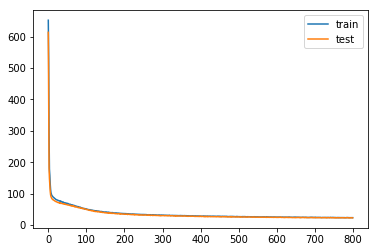

In [25]:
from keras.layers import Dropout


def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(64,input_length=shape[1], input_dim=shape[2]))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Dense(7))
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer="adam")
    model.summary()
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=800, batch_size=500, validation_split= 0.1)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model1
model.save('CMmodel1.h5')
del model

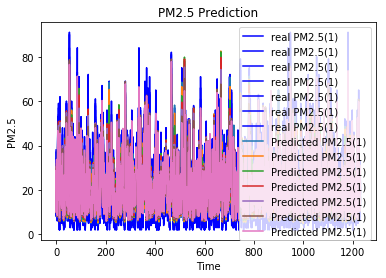

Train 0.3787878787878788
Validation 0.3192526401299756
6.463057487278254e+37
The R2 score on the Test set is:	0.878
Train Score: 4.07 RMSE
Test Score: 4.82 RMSE
The MSE   on the Test set is: 23.253829186426096
The RMSE  on the Test set is: 4.8222224322843195
The MAE   on the Test set is: 3.670041026849958
The MAPE  on the Test set is: 0.02348186119999862
The SMAPE on the Test set is: 0.01847335989309226


/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


In [26]:
#讀取model1
model = load_model('CMmodel1.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val, color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict, label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100

# MSE
print("The MSE   on the Test set is:",metrics.mean_squared_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好
# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用


In [22]:
from keras.layers import Dropout


def buildManyToOneModel(shape):
    model = Sequential()
    #model.add(LSTM(256,inputs_shape(X_train,Y_train)))
    model.add(LSTM(50,input_length=shape[1], input_dim=shape[2]))
    return_sequence=True
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #model.add(LSTM(256,activation='relu'))
    #kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01)
    #model.add(Dropout(0.3))          
    model.add(Dense(6))
    
    #sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)#optimizer優化器選擇
    model.add(Activation('linear'))
    model.compile(loss="mse", optimizer='adam')
    model.summary()    
    return model

model = buildManyToOneModel(X_train.shape)

history=model.fit(X_train, Y_train, epochs=200, batch_size=100, validation_split= 0.1)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#儲存model2
model.save('CMmodel2.h5')
del model

/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/home/gh555657/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(24, 6))`
  import sys


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                11400     
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 306       
_________________________________________________________________
activation_5 (Activation)    (None, 6)                 0         
Total params: 11,706
Trainable params: 11,706
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected activation_5 to have shape (6,) but got array with shape (7,)

In [ ]:
#讀取model2
model = load_model('CMmodel2.h5')
# 預測
trainPredict = model.predict(X_train)
testPredict = model.predict(X_val)

plt.plot(Y_val, color = 'blue', label = 'real PM2.5(1)')
#plt.plot(testPredict[0:10], color = 'red', label = 'Predicted PM2.5')
plt.plot(testPredict, label = 'Predicted PM2.5(1)')
plt.title('PM2.5 Prediction')
plt.xlabel('Time')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

print('Train',np.sum(np.abs(np.exp(trainPredict)-np.exp(Y_train))/np.exp(Y_train)<0.25)/Y_train.shape[0])

print('Validation',np.sum(np.abs(np.exp(testPredict)-np.exp(Y_val))/np.exp(Y_val)<0.25)/Y_val.shape[0])

print(np.sqrt(mean_squared_error(np.exp(Y_val),np.exp(testPredict))))

print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_val, testPredict)))
r2_train = r2_score(Y_val,testPredict)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(Y_train, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Y_val, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

# MAPE和SMAPE
def mape(y_true, y_pred): 
    n = len(y_true)
    return np.mean(np.abs((y_pred - y_true) / y_true))/n *100 

def smape(y_true, y_pred):
    n = len(y_true)
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))/n *100


# RMSE
print("The RMSE  on the Test set is:",np.sqrt(metrics.mean_squared_error(Y_val, testPredict))) # 範圍(0,+∞) 越小越好
# MAE
print("The MAE   on the Test set is:",metrics.mean_absolute_error(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# MAPE
print("The MAPE  on the Test set is:",mape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
# SMAPE
print("The SMAPE on the Test set is:",smape(Y_val, testPredict)) # 範圍(0,+∞) 越小越好 數據有0時不可用
